In [1]:
from models import *
import pandas as pd
import numpy as np
import tensorflow as tf
import shutil
import os
print("Tensorflow version: ", tf.__version__)

excel_reports = ".\Excel reports"
saved_models = ".\Saved models"
trained_models = ".\Trained models"
tested_models = ".\Tested models"

# Initiate parameters
ticker = 'mrk'
period = "w" # EODAPI = "w" YahooAPI - "1wk"

eod_api = True
api_key = ''

sentiment = True
# Sentiment types...
# APISentiment	VaderSentiment	CombinedVaderSentiment RobertaLargeSentiment #TwitterSentiment
sentiment_type = 'CombinedVaderSentiment'
aggr_function = 'median'

formation_window = 4
target_window = 1

split_ratio = 0.80

# Do not change
window_size = formation_window + 1

if sentiment == False:
    news_df = None
if sentiment_type == 'TwitterSentiment':
    twitter = True
else:
    twitter = False
    
# Print stuffs
print("\nwindow size: ", window_size)
print("formation_window: ", formation_window)
print("target_window: ", target_window)
print("chart period: ", period)

# training batches
batch_size_train = 16
batch_size_valid = 4

# Period model is trained and tested
start_date = '2020-01-01'  # ''2020-01-01   2015-01-01
end_date = '2022-10-08'  # '' 2022-08-17

# #Delete folders
shutil.rmtree(excel_reports)
shutil.rmtree(saved_models)
shutil.rmtree(trained_models)
shutil.rmtree(tested_models)

# Create folder, if exist pass exception
try:
    os.mkdir("Excel reports")
    os.mkdir("Saved models")
    os.mkdir("Trained models")
    os.mkdir("Tested models")
except:
    pass


Tensorflow version:  2.9.1

window size:  5
formation_window:  4
target_window:  1
chart period:  w


In [2]:
if sentiment == True:

    from sentiment import GetNews

    GetNewsAPI = GetNews()

    GetNewsAPI.fit(ticker=ticker, start_date=start_date, end_date=end_date,
                   n_news=1000, token=api_key, offset=0, export_excel=True, twitter=twitter)
    news_df = GetNewsAPI.transform()
news_df


c:\Users\z0040jeb\Desktop\MachineLearning\Data Science\VSCode\04_StockPrediction\04_stockprediction\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\z0040jeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\z0040jeb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


--------> GetNews completed



,Date,Title,Content,APISentiment,VaderSentiment,CombinedVaderSentiment
0,2022-09-24,"A Stock's Price ""Tells You Almost Nothing""","Last time we played The Market Cap Game Show, ...",0.671,0.0000,0.6710
1,2022-09-24,Merck (NYSE:MRK) shareholders have earned a 11...,"If you buy and hold a stock for many years, yo...",0.999,0.0000,0.9990
2,2022-09-23,Merck's (MRK) Stock Up on Januvia Patent Win A...,Merck’s MRK stock was up 3.5% on Thursday afte...,0.977,0.5859,1.5629
3,2022-09-23,Pharma Stock Roundup: EU Nod to AZN &amp; RHHB...,"This week, the European Commission (EC) grante...",0.997,0.0000,0.9970
4,2022-09-23,10 Most Shorted Stocks in September,"In this article, we discuss the 10 most shorte...",0.994,0.0000,0.9940
...,...,...,...,...,...,...
985,2021-12-19,Pioneer VCT Fund Buys Live Nation Entertainmen...,Investment company Pioneer VCT Fund (Current P...,0.995,0.4215,1.4165
986,2021-12-17,Variable Portfolio - Partners International Gr...,Investment company Variable Portfolio - Partne...,0.998,0.3818,1.3798
987,2021-12-17,Portfolio manager breaks down market worries o...,"John Petrides, portfolio manager at Tocquevill...",-0.077,-0.4215,-0.4985
988,2021-12-17,BioInvent announces positive early data from o...,"LUND, SE / ACCESSWIRE / December 17, 2021 / Bi...",0.972,-0.0516,0.9204


In [6]:
from transformers_preprocess import PullData

GetData = PullData()

GetData.fit(ticker=ticker,
            start_date=start_date,
            end_date=end_date,
            interval=period,  # 1wk
            progress=False,
            condition=False,
            form_window=formation_window,
            target_window=target_window,
            timeperiod1=6,
            timeperiod2=12,
            timeperiod3=24,
            export_excel=True,
            excel_path=excel_reports,
            listed_conditions=None,
            sentiment=sentiment,
            sentiment_type=sentiment_type, #sentiment_type
            news_df=news_df,
            chart_period=period,
            sentiment_aggr=aggr_function,
            eod_API=eod_api,
            eod_key=api_key
            )

data_prep = GetData.transform()

# Validation
if window_size != (formation_window + 1):
    raise Exception(
        f"Error - window_size ({window_size}) must be equal to sum of formation_window ({formation_window}) and value 1.")
data_prep.head(20)


         date   open     high     low  close  adjusted_close    volume
0  2020-01-02  91.08  92.1400  90.365  91.25         79.4224  13510415
1  2020-01-06  91.23  91.7350  88.410  89.53         77.9254  47256926
2  2020-01-13  89.52  92.0554  88.870  90.97         79.1787  43785406
3  2020-01-21  90.72  90.9700  85.580  85.98         74.8355  43870859
4  2020-01-27  85.10  88.1600  84.710  85.44         74.3655  47226440
initial shape:  (145, 6)
Output shape:  (705, 10)
--------> PullData completed



,Date,Open,High,Low,Close,EMA6,EMA12,EMA24,CombinedVaderSentiment,trades
0,2020-01-02 00:00:00,91.08,92.1400,90.365,91.25,88.041667,83.3425,81.040417,0.0,1
1,2020-01-06 00:00:00,91.23,91.7350,88.410,89.53,88.041667,83.3425,81.040417,0.0,1
2,2020-01-13 00:00:00,89.52,92.0554,88.870,90.97,88.041667,83.3425,81.040417,0.0,1
3,2020-01-21 00:00:00,90.72,90.9700,85.580,85.98,88.041667,83.3425,81.040417,0.0,1
0,Month,85.10,88.1600,84.710,85.44,88.041667,83.3425,81.040417,0.0,1
1,2020-01-06 00:00:00,91.23,91.7350,88.410,89.53,88.041667,83.3425,81.040417,0.0,2
2,2020-01-13 00:00:00,89.52,92.0554,88.870,90.97,88.041667,83.3425,81.040417,0.0,2
3,2020-01-21 00:00:00,90.72,90.9700,85.580,85.98,88.041667,83.3425,81.040417,0.0,2
4,2020-01-27 00:00:00,85.10,88.1600,84.710,85.44,88.041667,83.3425,81.040417,0.0,2
0,Month,86.04,89.2000,84.000,85.08,88.041667,83.3425,81.040417,0.0,2


In [8]:
####################################################################

from transformers_preprocess import NormalizeData

NormalizeData = NormalizeData()

NormalizeData.fit(window_size=window_size, shuffle=False, debug=False,
                  export_excel=True, excel_path=excel_reports, sentiment=sentiment)

data_normalized, Dates = NormalizeData.transform(data_prep)
data_normalized.head()
# Get only forecasts for model testing
# x_valid_x = data_normalized[['maxv','minv']].copy() #extreme values for reverting normalization
# x_valid = data_normalized.iloc[:,:-2].copy() #dataset for forecast


Dataframe shape:  (705, 10)
Number of formations:  141
--------> NormalizeData completed



,Open,High,Low,Close,EMA6,EMA12,EMA24,CombinedVaderSentiment,maxv,minv
0,0.904501,1.000000,0.840084,0.919817,0.630767,0.207403,0.0,0.0,92.14,81.040417
1,0.918015,0.963512,0.663951,0.764856,0.630767,0.207403,0.0,0.0,92.14,81.040417
2,0.763955,0.992378,0.705394,0.894591,0.630767,0.207403,0.0,0.0,92.14,81.040417
3,0.872067,0.894591,0.408987,0.445024,0.630767,0.207403,0.0,0.0,92.14,81.040417
0,0.365742,0.641428,0.330606,0.396374,0.630767,0.207403,0.0,0.0,92.14,81.040417


In [9]:
####################################################################

from training import SplitData

SplitData = SplitData()

SplitData.fit(split_ratio=split_ratio, window_size=window_size,
              dates=Dates, debug=False, export_excel=True, excel_path=excel_reports, sentiment=sentiment)

x_train, x_valid, x_train_x, x_valid_x = SplitData.transform(data_normalized)
# x_train.head(25)



Split ratio: 80 %
train period: 2020-01-02 - 2022-03-14
valid period: 2022-02-28 - 2022-09-26
x_train window:  113.0
x_valid window:  28.0
--------> SplitData completed



In [10]:
from training import GetTensoredDataset

GetTensoredDataset = GetTensoredDataset()

GetTensoredDataset.fit(window_size=window_size, batch_size=batch_size_train, train=True, debug=False)

x_train_tensors, _ = GetTensoredDataset.transform(x_train)

# c = 0
# for batch in x_train_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break

--------> GetTensoredDataset completed



In [11]:
from training import GetTensoredDataset

GetTensoredValidDataset = GetTensoredDataset()

GetTensoredValidDataset.fit(
    window_size=window_size, batch_size=batch_size_valid, train=False, debug=False)

x_valid_tensors, labels = GetTensoredValidDataset.transform(x_valid)

# for batch in x_valid_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break

--------> GetTensoredDataset completed



<b>Model Training</b>

In [12]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint


model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

early_stopping = EarlyStopping(
    monitor='val_loss', patience=6, mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=10e-15,
                              verbose=0)

model_checkpoint = ModelCheckpoint(monitor='val_loss',
                                   filepath=model_name,
                                   save_best_only=True)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true*y_pred, 0),
                    penalty * tf.square(y_true-y_pred),
                    tf.square(y_true - y_pred)
                    )

    return(tf.reduce_mean(loss, axis=-1))


tf.keras.losses.sign_penalty = sign_penalty


Bellow code is used to find the best model architecture, recommended to use cloud computing

In [9]:
from datetime import datetime
start_time = datetime.now().strftime("%H:%M:%S")
start = datetime.now()
print("Training started at ",start_time)
tf.random.set_seed(7788)
np.random.seed(7788)

# #Permutation testing
# num_layers = 2
# min, max = 2, 4
# node_step_size = 2
# node_options = list(range(min, max + 1, node_step_size))
# two_layer_possibilities = [node_options, node_options]
# layer_node_permutations  = list(itertools.product(*two_layer_possibilities))

from testing import *
f_df = pd.DataFrame()

for layer in range(4,5):
    print("------ > Layer: ",layer)
    all_models, names = get_models(num_layers=layer, min=2, max=3, node_step_size=1, features=x_train.shape[1])
    optimizing_df = optimize(models=all_models,X_train=x_train_tensors,X_valid=x_valid_tensors,X_test=x_valid,labels=labels,epochs=1000,verbose=0,window_size=window_size,callbacks=callbacks,layer=layer,ticker=ticker,excel_path=tested_models)
# optimizing_df
    #f_df = f_df.append(optimizing_df)
    
end_time = datetime.now().strftime("%H:%M:%S")
end = datetime.now()
print("\nTraining ended at ",end_time) 
print(f"Training ended in {round((end-start).total_seconds(),2)} seconds")

Training started at  12:27:53
------ > Layer:  4
CNN-nodes-2_kernel1lstmBI-2_lstm-2_dense2
CNN-nodes-2_kernel10lstmBI-2_lstm-2_dense2
CNN-nodes-2_kernel1lstmBI-2_lstm-2_dense3
CNN-nodes-2_kernel10lstmBI-2_lstm-2_dense3


KeyboardInterrupt: 

In [10]:
# print(len(optimizing_df))
# optimizing_df

Get Model

In [13]:
from datetime import datetime
start_time = datetime.now().strftime("%H:%M:%S")
start = datetime.now()
print("Training started at ",start_time)
tf.random.set_seed(7788)
np.random.seed(7788)
features = x_train.shape[1]

print(f"Model training - {str.upper(ticker)} \n")

#model = clb_model(features)
#model = mrk_model(features)
#model =  mrk_model_sent_medium(features)

model = tf.keras.models.Sequential([

        tf.keras.layers.Conv1D(filters=20, kernel_size=1,
                               strides=1, padding="same",
                               activation=tf.nn.selu,
                               input_shape=[None, features]),
        tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(3, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2)),
        tf.keras.layers.Dense(2, activation=tf.nn.selu),
        tf.keras.layers.Dense(1, activation=tf.nn.relu),
    ])


optimizer2 = tf.keras.optimizers.Adam(
            learning_rate=0.0007, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
optimizer5 = tf.keras.optimizers.Adagrad(
    learning_rate=0.005, initial_accumulator_value=5, epsilon=1e-07, name='Adagrad')

model.compile(loss=sign_penalty,
              optimizer=optimizer2,
              )

model.fit(x_train_tensors, epochs=1000, callbacks=[
          callbacks], validation_data=x_valid_tensors,verbose=1)


end_time = datetime.now().strftime("%H:%M:%S")
end = datetime.now()
print("\nTraining ended at ",end_time) 
print(f"Training ended in {round((end-start).total_seconds(),2)} seconds")



Training started at  12:52:31
Model training - MRK 

Epoch 1/1000
8/8 [==============================] - 9s 436ms/step - loss: 0.4887 - val_loss: 0.5196 - lr: 7.0000e-04
Epoch 2/1000
8/8 [==============================] - 0s 18ms/step - loss: 0.3839 - val_loss: 0.4311 - lr: 7.0000e-04
Epoch 3/1000
8/8 [==============================] - 0s 18ms/step - loss: 0.2966 - val_loss: 0.3567 - lr: 7.0000e-04
Epoch 4/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.2305 - val_loss: 0.2935 - lr: 7.0000e-04
Epoch 5/1000
8/8 [==============================] - 0s 17ms/step - loss: 0.1801 - val_loss: 0.2395 - lr: 7.0000e-04
Epoch 6/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.1416 - val_loss: 0.1942 - lr: 7.0000e-04
Epoch 7/1000
8/8 [==============================] - 0s 17ms/step - loss: 0.1129 - val_loss: 0.1576 - lr: 7.0000e-04
Epoch 8/1000
8/8 [==============================] - 0s 46ms/step - loss: 0.0927 - val_loss: 0.1294 - lr: 7.0000e-04
Epoch 9/1000
8/8 [

In [14]:
def model_forecast(model, series, window_size, debug):
    """
    Get model, data and window size as an input. 
    Make prediction window is subtracted by 1, since we do not need label in window, 
    label value is skipped
    """
    c = 0

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size-1, shift=window_size, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))

    if debug == True:
        # This block of code will print out data on which is made prediction
        for item in ds:
            c += 1
            if c < 3:
                print("\n"+str(c) + " prediction:\n ", item)
            else:
                break

    ds = ds.batch(1).prefetch(1)
    forecast = model.predict(ds)
    forecast2 = np.squeeze(forecast)
    return forecast2


forecast = model_forecast(model, x_valid, window_size=window_size, debug=False)
# result_list = sign_penalty(labels, forecast).numpy()
# result_list


28/28 [==============================] - 2s 3ms/step


In [15]:
# pr = x_valid.iloc[:24, :].to_numpy()
# pr = np.array([pr])
# pr = np.array([pr])
# pred = tf.data.Dataset.from_tensor_slices(pr)


In [16]:
from transformers_preprocess import ReverseNormalization

ReverseNormalization = ReverseNormalization()

ReverseNormalization.fit(forecasts=forecast, labels=labels,
                         x_valid=x_valid, x_valid_x=x_valid_x, window_size=window_size, debug=False,
                         sentiment=sentiment,sentiment_type=sentiment_type)

df = ReverseNormalization.transform()
df.head(25)

--------> ReverseNormalization completed



,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment
In,,,,,,,,,,
0,75.83,77.8600,74.780,77.83,77.569071,77.924519,78.076373,NaN,NaN,0.35190
1,77.01,79.6250,76.080,78.26,77.766479,77.976132,78.091063,NaN,NaN,1.23185
2,77.90,79.7350,77.310,79.11,78.150342,78.150573,78.172578,NaN,NaN,0.32155
3,79.67,81.3800,78.765,81.34,79.061673,78.641254,78.425972,NaN,NaN,0.18315
4,81.37,83.5800,80.730,83.52,77.766479,77.976132,78.091063,83.5800,83.286131,1.23185
5,77.01,79.6250,76.080,78.26,77.766479,77.976132,78.091063,NaN,NaN,1.23185
6,77.90,79.7350,77.310,79.11,78.150342,78.150573,78.172578,NaN,NaN,0.32155
7,79.67,81.3800,78.765,81.34,79.061673,78.641254,78.425972,NaN,NaN,0.18315
8,81.37,83.5800,80.730,83.52,80.335481,79.391830,78.833494,NaN,NaN,0.99200


In [17]:
from final_evaluation import GetFinalDataframe

GetFinalDataframe = GetFinalDataframe()

GetFinalDataframe.fit(dates=Dates,
                      x_valid=x_valid,
                      sentiment=sentiment,
                      sentiment_type=sentiment_type)

reversed_df = GetFinalDataframe.transform(df)
reversed_df.head(25)


--------> GetFinalDataframe



,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment,Datetime
In,,,,,,,,,,,
0,75.83,77.8600,74.780,77.83,77.569071,77.924519,78.076373,nn,nn,0.35190,2022-02-28
1,77.01,79.6250,76.080,78.26,77.766479,77.976132,78.091063,nn,nn,1.23185,2022-03-07
2,77.90,79.7350,77.310,79.11,78.150342,78.150573,78.172578,nn,nn,0.32155,2022-03-14
3,79.67,81.3800,78.765,81.34,79.061673,78.641254,78.425972,nn,nn,0.18315,2022-03-21
4,81.37,83.5800,80.730,83.52,77.766479,77.976132,78.091063,83.58,83.286131,0.00000,2022-03-22
5,77.01,79.6250,76.080,78.26,77.766479,77.976132,78.091063,nn,nn,1.23185,2022-03-07
6,77.90,79.7350,77.310,79.11,78.150342,78.150573,78.172578,nn,nn,0.32155,2022-03-14
7,79.67,81.3800,78.765,81.34,79.061673,78.641254,78.425972,nn,nn,0.18315,2022-03-21
8,81.37,83.5800,80.730,83.52,80.335481,79.391830,78.833494,nn,nn,0.99200,2022-03-28


In [18]:
from final_evaluation import GetModelPerformance
#print(f"Window size: {window_size} \n")
print(f"ticker: {str.upper(ticker)}\n")
GetModelPerformance = GetModelPerformance()

GetModelPerformance.fit(acceptance=0,
                        penalization=0,
                        entry_candle='Current Open',
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports,
                        sentiment=sentiment)

trades_df = GetModelPerformance.transform(reversed_df)
#trades_df.head(25)


ticker: MRK

Formations:  28
period: 2022-02-28 - 2022-09-26
Entry Candle:  Current Open

Total Trades:  25
Profit Trades:  18
Loss Trades:  7

Win Ratio: 72.0 %
Loss Ratio: 28 %

Trade nr with exact TP:  17
Ratio of exact TP: 68.0 %

Average profit per trade:  103

Gross profit:  2580
Gross loss:  -1236

Net profit:  1344


In [23]:
trade = 1
budget = 10000
entry_candle = 'Current Open'

Trade:  1
Window size:  5
Period: 2022-02-14 - 2022-03-07

Budget:  10000

Entry price:  77.9
Label (target):  79.74
Model prediction:  79.17
Market Change: 1.27 $
Profit: 163.03 $


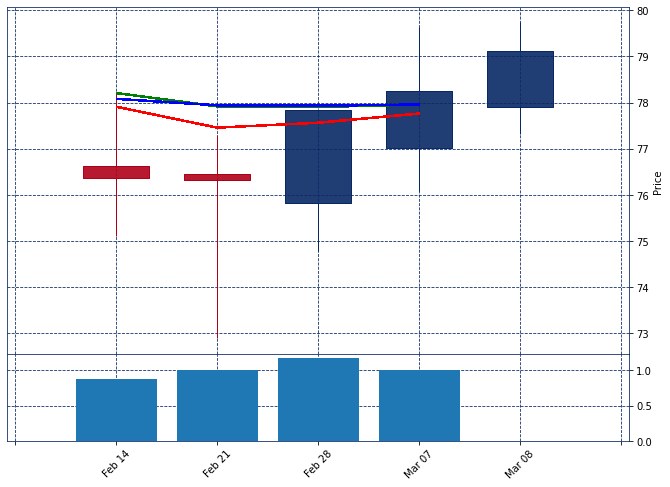

,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment,Datetime,profit,trade
In,,,,,,,,,,,,,
0,76.629997,78.190002,75.110001,76.370003,77.909017,78.206483,78.080399,nn,nn,0.87045,2022-02-14,1.273226,1
1,76.459999,77.290001,72.879997,76.320000,77.455012,77.916255,77.939567,nn,nn,0.99750,2022-02-21,1.273226,1
2,75.830002,77.860001,74.779999,77.830002,77.562152,77.902985,77.930802,nn,nn,1.15980,2022-02-28,1.273226,1
3,77.010002,79.629997,76.080002,78.260002,77.761538,77.957911,77.957138,nn,nn,0.99800,2022-03-07,1.273226,1
4,77.900002,79.739998,77.309998,79.110001,77.455012,77.916255,77.939567,79.739998,79.173227,0.00000,2022-03-08,1.273226,1


In [24]:
#trade = 4
from plotting import PlotTrade

df = PlotTrade(trade=trade,trades_df=trades_df,window_size=window_size,entry_candle=entry_candle,budget=budget,sentiment=sentiment)
trade += 1
df


In [25]:
from final_evaluation import GetPerformanceReport

GetPerformanceReport = GetPerformanceReport()

GetPerformanceReport.fit(entry_candle="Current Open",
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports)

trades_df_final = GetPerformanceReport.transform(trades_df)
trades_df_final


--------> GetPerformanceReport completed



,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment,Datetime,profit,trade,Entry,Performance
0,76.629997,78.190002,75.110001,76.370003,77.909017,78.206483,78.080399,nn,nn,0.87045,2022-02-14,1.273226,1,nn,nn
1,76.459999,77.290001,72.879997,76.320000,77.455012,77.916255,77.939567,nn,nn,0.99750,2022-02-21,1.273226,1,nn,nn
2,75.830002,77.860001,74.779999,77.830002,77.562152,77.902985,77.930802,nn,nn,1.15980,2022-02-28,1.273226,1,nn,nn
3,77.010002,79.629997,76.080002,78.260002,77.761538,77.957911,77.957138,nn,nn,0.99800,2022-03-07,1.273226,1,nn,nn
4,77.900002,79.739998,77.309998,79.110001,77.455012,77.916255,77.939567,79.739998,79.173227,0.00000,2022-03-08,1.273226,1,77.900002,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,91.809998,92.220001,89.070000,89.260002,90.332518,90.065515,88.255073,nn,nn,0.99000,2022-08-22,-0.070000,23,nn,nn
111,88.830002,89.000000,85.160004,86.230003,89.160371,89.475436,88.093068,nn,nn,0.99250,2022-08-29,-0.070000,23,nn,nn
112,86.580002,88.169998,85.070000,87.339996,88.640264,89.146907,88.032822,nn,nn,0.98600,2022-09-05,-0.070000,23,nn,nn
113,88.129997,89.169998,86.110001,87.720001,88.377332,88.927383,88.007796,nn,nn,0.99300,2022-09-12,-0.070000,23,nn,nn


In [26]:
from final_evaluation import MakeSinglePrediction

model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

MakeSinglePrediction = MakeSinglePrediction()

fit_output = MakeSinglePrediction.fit(
                        model_name=model_name,
                        form_window=formation_window,
                        ticker=ticker,
                        start_date="2021-03-18",
                        end_date="2022-10-02",
                        interval='1wk',
                        progress=False,
                        condition=False,
                        timeperiod1=6,
                        timeperiod2=12,
                        timeperiod3=24,
                        debug=False,
                        budget=10000,
                        penalization=0,
                        acceptance=0,
                        entry_candle='Current Open',
                        news_df=news_df,
                        sentiment=sentiment,
                        sentiment_type = sentiment_type,
                        sentiment_aggr = aggr_function)

#fit method outputs tuple, get only trade formation out of tuple
trade_formation = fit_output[1]
final_trade_formation = trade_formation.head(24)
final_trade_formation
###IMPORTANT!!!!
#trade_formation dataframe must be checked before transformation, sometimes df pulled via yahoo finance 
# is shifted, and trade formation does not have entire formation in itself. in this case there must 
# be changed end_date in fit method
final_trade_formation


,Date,Open,High,Low,Close,EMA6,EMA12,EMA24,CombinedVaderSentiment
0,2022-08-29,88.830002,89.000000,85.160004,86.230003,89.160371,89.475437,88.086169,0.726783
1,2022-09-05,86.580002,88.169998,85.070000,87.339996,88.640264,89.146907,88.026475,0.523185
2,2022-09-12,88.129997,89.169998,86.110001,87.720001,88.377332,88.927383,88.001957,0.552186
3,2022-09-19,86.849998,88.150002,84.519997,86.779999,87.920951,88.597016,87.904200,0.922004
4,2022-09-26,86.120003,87.629997,85.290001,86.120003,87.406394,88.215937,87.761464,0.000000



Ticker:  mrk
1/1 [==============================] - 2s 2s/step

Entry candle (Current Open)

Budget:  10000

Entry price:  86.12
Prediction:  87.51
Expected Market move:  1.39
Expected Profit:  160.98


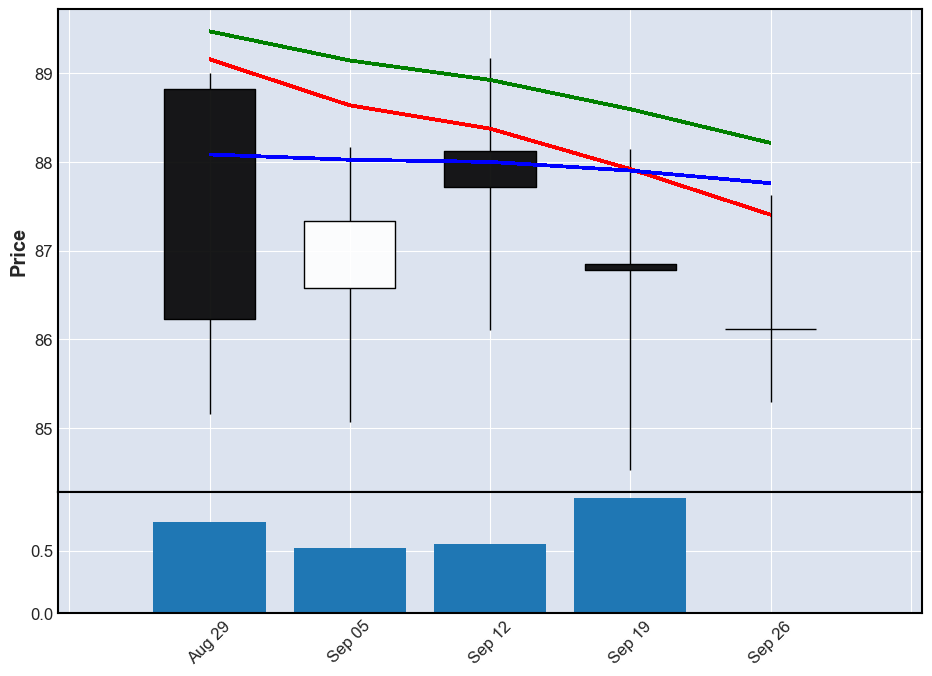

In [27]:
#Make prediction
MakeSinglePrediction.transform(final_trade_formation)

#PLot current chart and sentiment
from plotting import PlotCurrentFormation

PlotCurrentFormation(final_trade_formation,sentiment=sentiment)


<b>Record Predictions</b>

In [34]:
final_df = pd.DataFrame()
#List all predictions
dicti_prediction1 = {'ticker':['STNSE'],'Date':['21.8.2022'],'prediction':['12.97 (should be penalized by 2 - 10.97)'],'real market move':['pending'],'model':[""]}
dicti_prediction2 = {'ticker':['CLB'],'Date':['21.8.2022'],'prediction':['18.6'],'real market move':['succesful - 12.9.2022'],'model':[""]}
dicti_prediction3 = {'ticker':['MRK'],'Date':['27.8.2022'],'prediction':['93.23'],'real market move':['failed'],'model':[""]}
dicti_prediction4 = {'ticker':['CLB'],'Date':['04.9.2022'],'prediction':['18.08'],'real market move':['succesful - 9.9.2022'],'model':[model_name]}
dicti_prediction5 = {'ticker':['MRK'],'Date':['11.9.2022'],'prediction':['91.31'],'real market move':['pending'],'model':[model_name]}
dicti_prediction6 = {'ticker':['MRK'],'Date':['24.9.2022'],'prediction':['91.8'],'real market move':['pending'],'model':[model_name]}

trades_tuple = (dicti_prediction1,dicti_prediction2,dicti_prediction3,dicti_prediction4,dicti_prediction5,dicti_prediction6)
for item in trades_tuple:
    df_pred = pd.DataFrame(item)
    final_df = final_df.append(df_pred)
    final_df = final_df.sort_values('ticker',ascending=False)
final_df

,ticker,Date,prediction,real market move,model
0,STNSE,21.8.2022,12.97 (should be penalized by 2 - 10.97),pending,
0,MRK,27.8.2022,93.23,failed,
0,MRK,11.9.2022,91.31,pending,.\Saved models/MRK_24_4_25_0.8_1wk_True_2020-0...
0,MRK,24.9.2022,91.8,pending,.\Saved models/MRK_24_4_25_0.8_1wk_True_2020-0...
0,CLB,21.8.2022,18.6,succesful - 12.9.2022,
0,CLB,04.9.2022,18.08,succesful - 9.9.2022,.\Saved models/MRK_24_4_25_0.8_1wk_True_2020-0...
